## Exercise 


For this exercise, you will be working with the [House Price Dataset](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/code).

Please grab the train.csv file from Kaggle and explore this dataset. You need to perform explroatory data analysis and see if there is any correlation between the variables and analyze the distribution of the dataset. The question is open-ended and basically you're asked to perform EDA. 


1- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 3 of your assignment, you need to submit at least one jupyter notebook file and one pdf file.


2- Push your code and project to github and provide the link to your code here. Ensure that your github project is organized to at least couple of main folders, ensure that you have the README file as well:

- Src
- Data
- Docs
- Results

Read this link for further info:  https://gist.github.com/ericmjl/27e50331f24db3e8f957d1fe7bbbe510





In [ ]:
https://github.com/Anddykoko/CPSC_4800_HousePrice

In [1]:
pwd

'C:\\Users\\HP\\Documents\\a Term 1\\CPSC 4800_Computing for Data Analytics\\Assignment questions\\Assignment_3 attached files Feb 13, 2025 1019 PM'

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Load the data sets

In [ ]:
# Load the data sets
houseprice_df = pd.read_csv('train.csv')

# Display basic information about the dataset
houseprice_df_info = houseprice_df.info()
houseprice_df_head = houseprice_df.head()
houseprice_df_describe = houseprice_df.describe()

houseprice_df_info, houseprice_df_head, houseprice_df_describe

#checking for missing values

In [68]:
#check for missing values
# Count missing values by column
missing_data = houseprice_df.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

missing_data

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

#removing the missing valuse using imputation (ie Median and mode

In [47]:
from sklearn.impute import SimpleImputer

# Impute numerical columns with the median
num_cols = houseprice_df.select_dtypes(include=['number']).columns
num_imputer = SimpleImputer(strategy='median')
houseprice_df[num_cols] = num_imputer.fit_transform(houseprice_df[num_cols])

# Impute categorical columns with the most frequent value (mode)
cat_cols = houseprice_df.select_dtypes(include=['object']).columns
cat_imputer = SimpleImputer(strategy='most_frequent')
houseprice_df[cat_cols] = cat_imputer.fit_transform(houseprice_df[cat_cols])

# Confirm no missing values remain
print(houseprice_df.isnull().sum().sum(), "missing values remain")


0 missing values remain


#univariate analysis

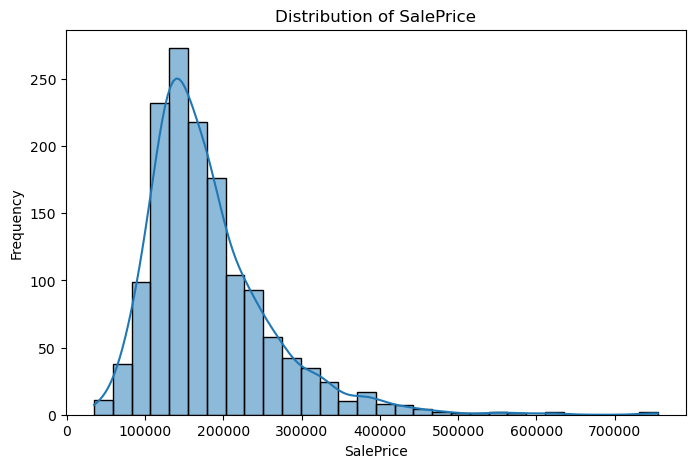

In [48]:
# SalePrice Distribution
plt.figure(figsize=(8, 5))
sns.histplot(houseprice_df["SalePrice"], bins=30, kde=True)
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()

#Performing the correlation (i.e checking for the relationship

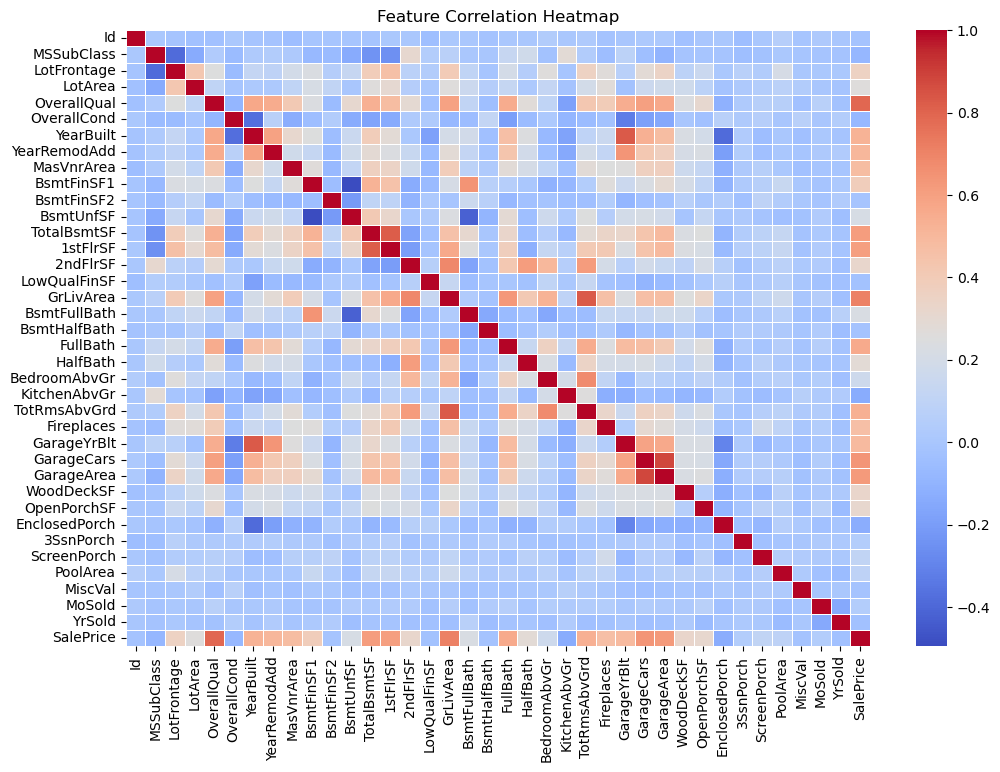

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

In [69]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = houseprice_df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Top correlated features with SalePrice
top_corr_features = correlation_matrix["SalePrice"].sort_values(ascending=False).head(10)
top_corr_features

#Apply Log Transformation to Saleprice

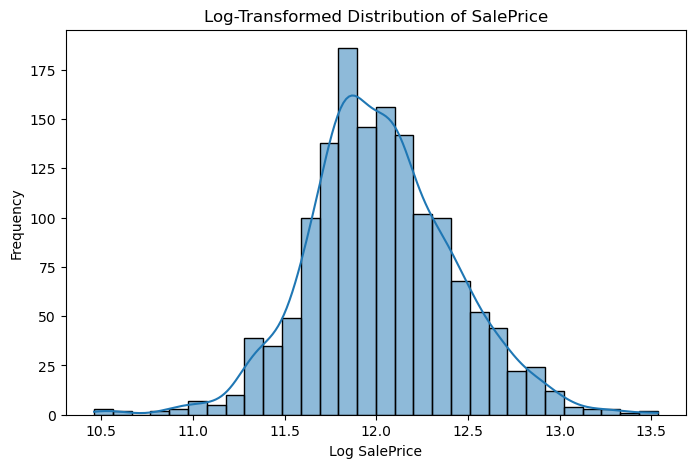

In [50]:
houseprice_df["SalePrice"] = np.log1p(houseprice_df["SalePrice"])

# Plot transformed SalePrice distribution
plt.figure(figsize=(8, 5))
sns.histplot(houseprice_df["SalePrice"], bins=30, kde=True)
plt.title("Log-Transformed Distribution of SalePrice")
plt.xlabel("Log SalePrice")
plt.ylabel("Frequency")
plt.show()

#Boxplot for OverallQual vs SalePrice

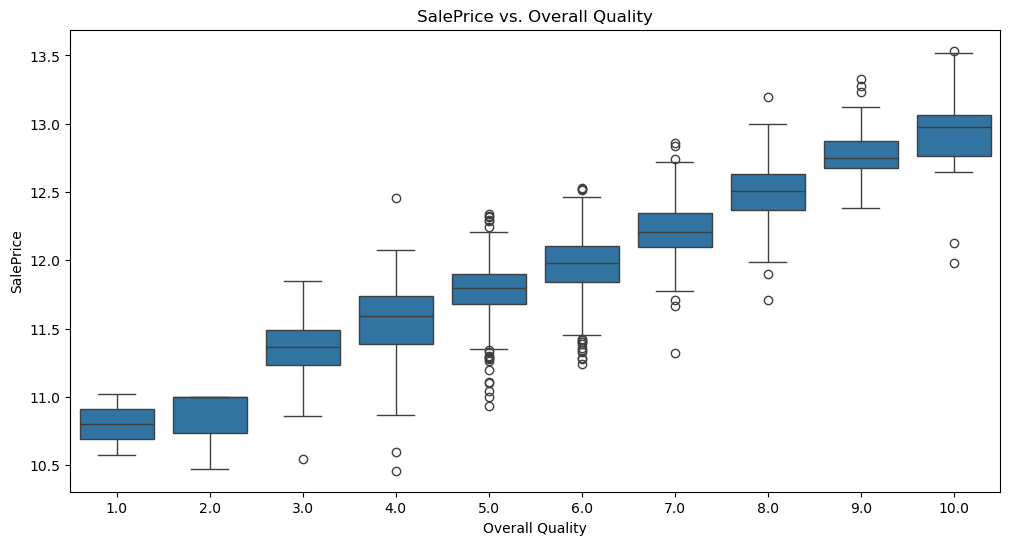

In [52]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=houseprice_df["OverallQual"], y=houseprice_df["SalePrice"])
plt.title("SalePrice vs. Overall Quality")
plt.xlabel("Overall Quality")
plt.ylabel("SalePrice")
plt.show()

#Boxplot for YearBuilt vs SalePrice

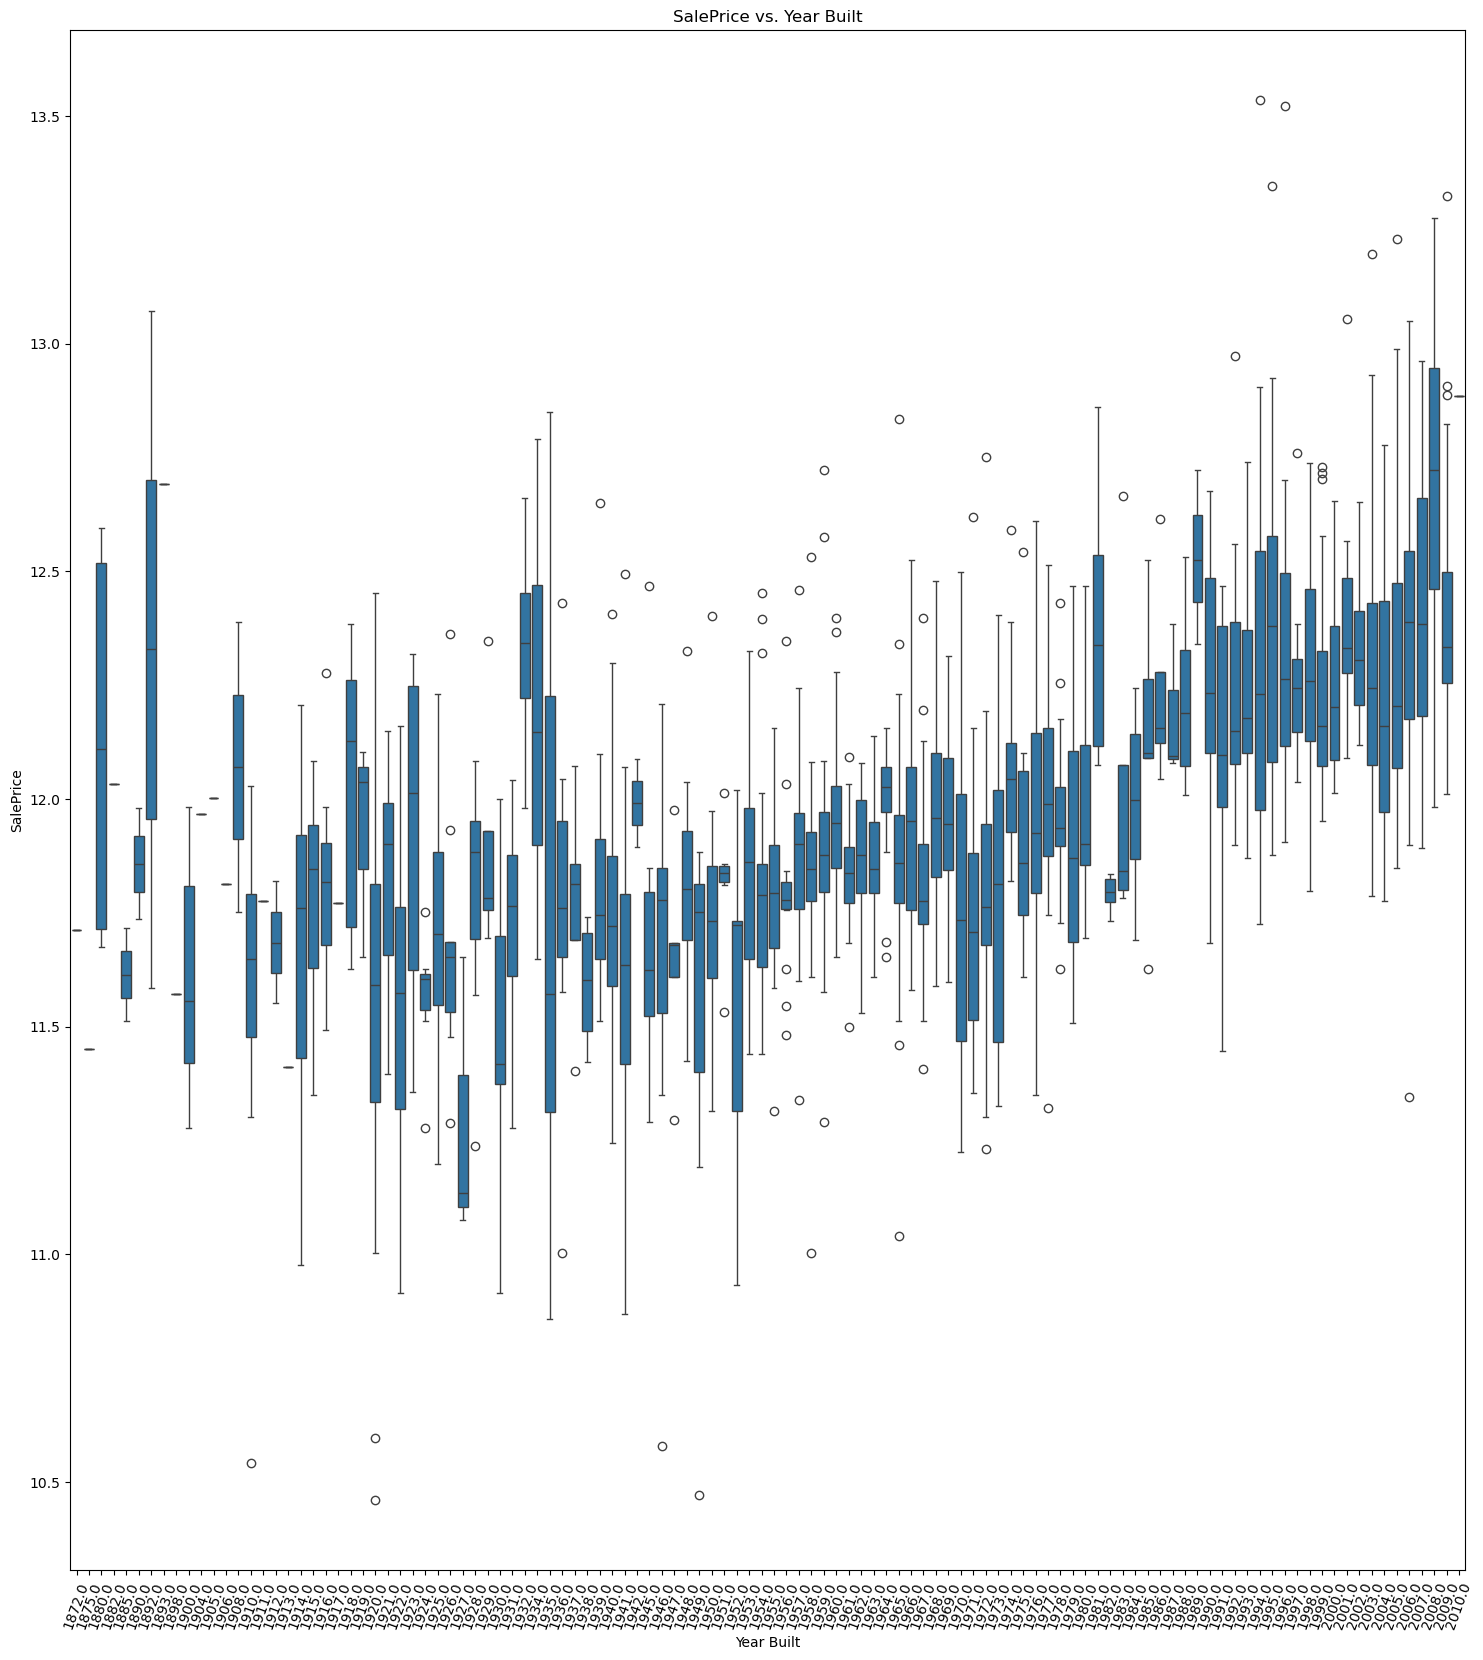

In [54]:
plt.figure(figsize=(18, 20))
sns.boxplot(x=houseprice_df["YearBuilt"], y=houseprice_df["SalePrice"])
plt.xticks(rotation=70)
plt.title("SalePrice vs. Year Built")
plt.xlabel("Year Built")
plt.ylabel("SalePrice")
plt.show()

In [55]:
#Boxplot for YrSold vs SalePrice

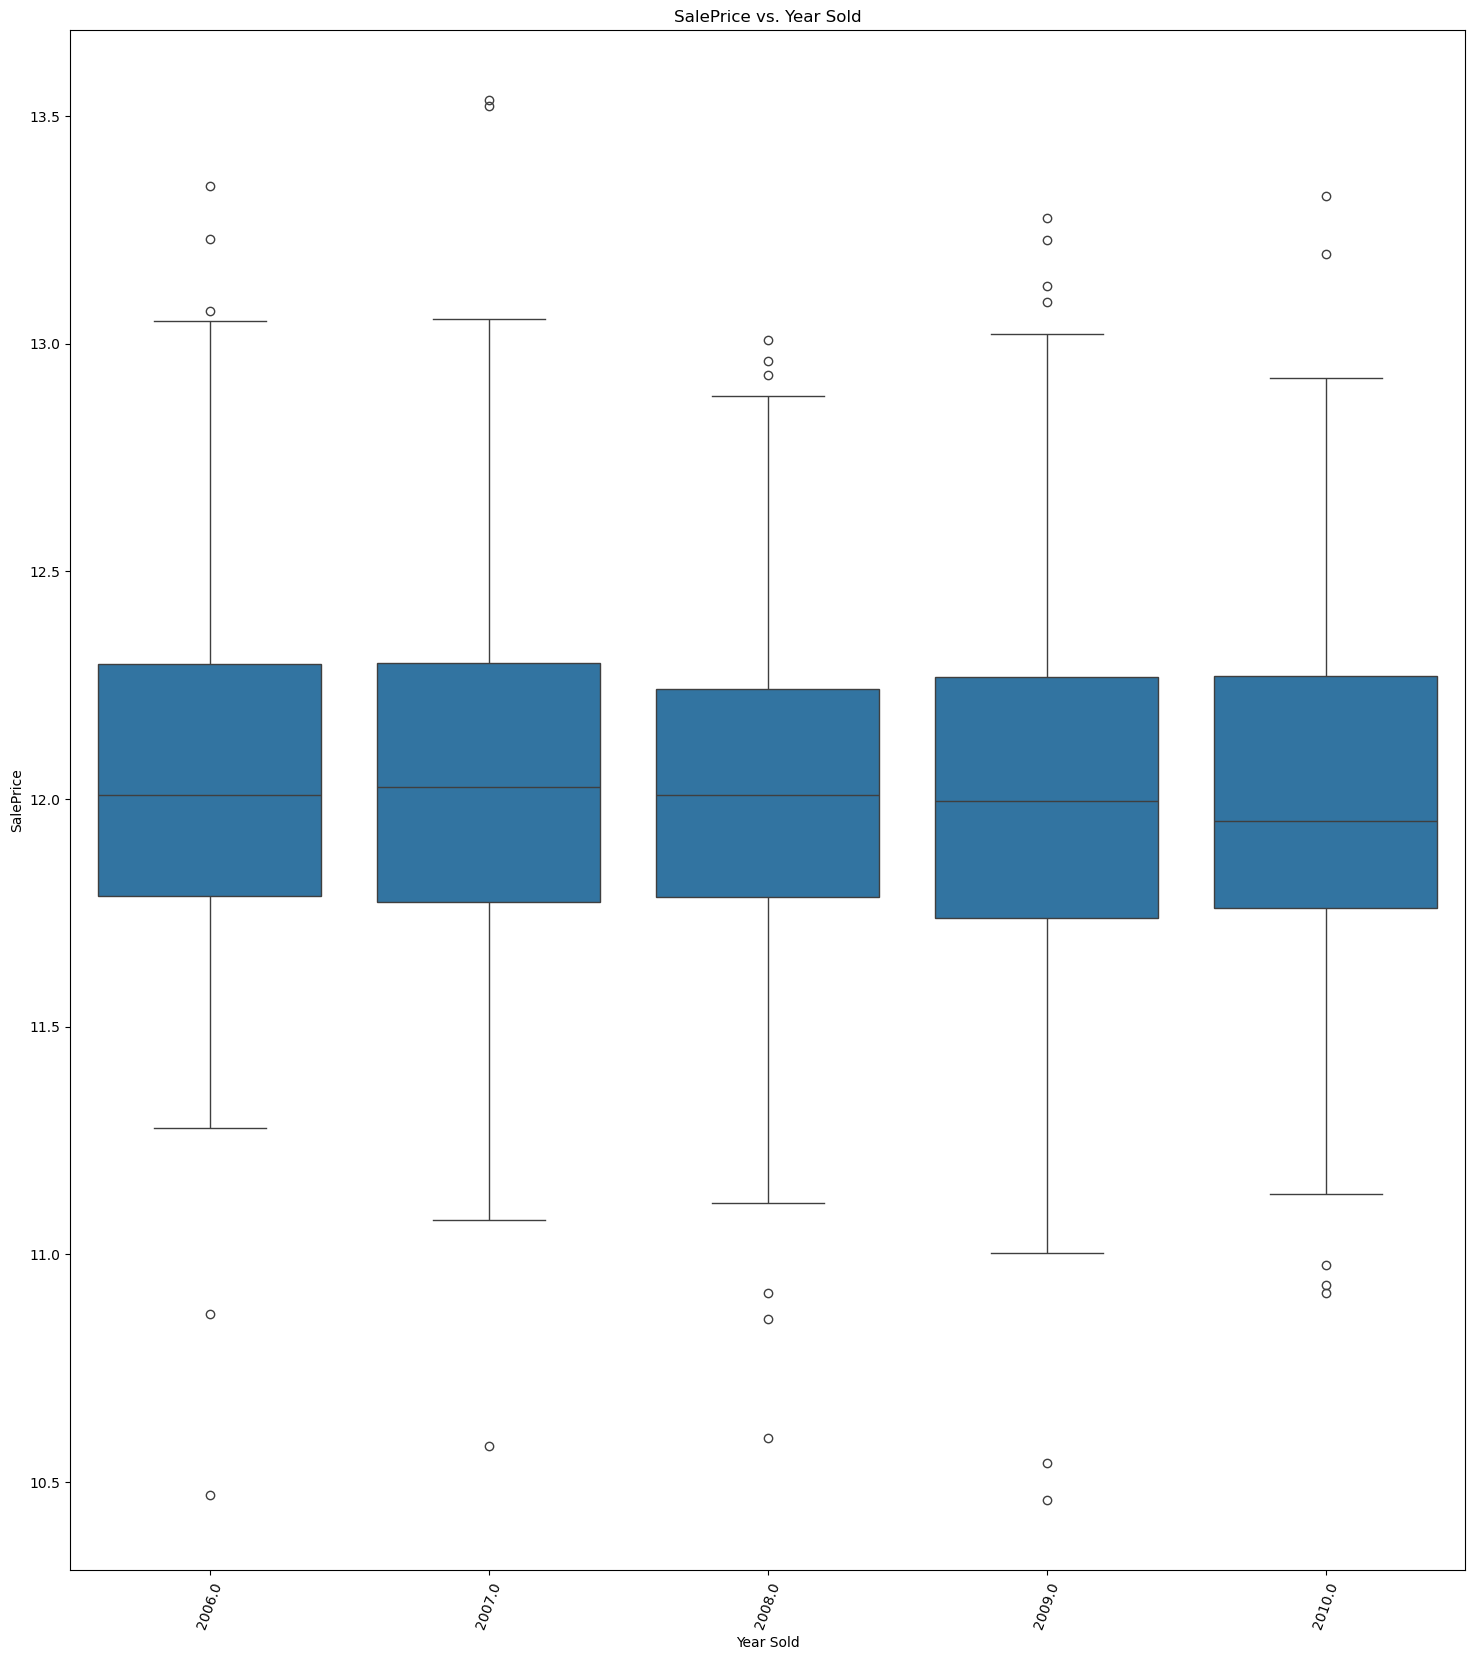

In [56]:
plt.figure(figsize=(18, 20))
sns.boxplot(x=houseprice_df["YrSold"], y=houseprice_df["SalePrice"])
plt.xticks(rotation=70)
plt.title("SalePrice vs. Year Sold")
plt.xlabel("Year Sold")
plt.ylabel("SalePrice")
plt.show()

#pairplot of the train data set

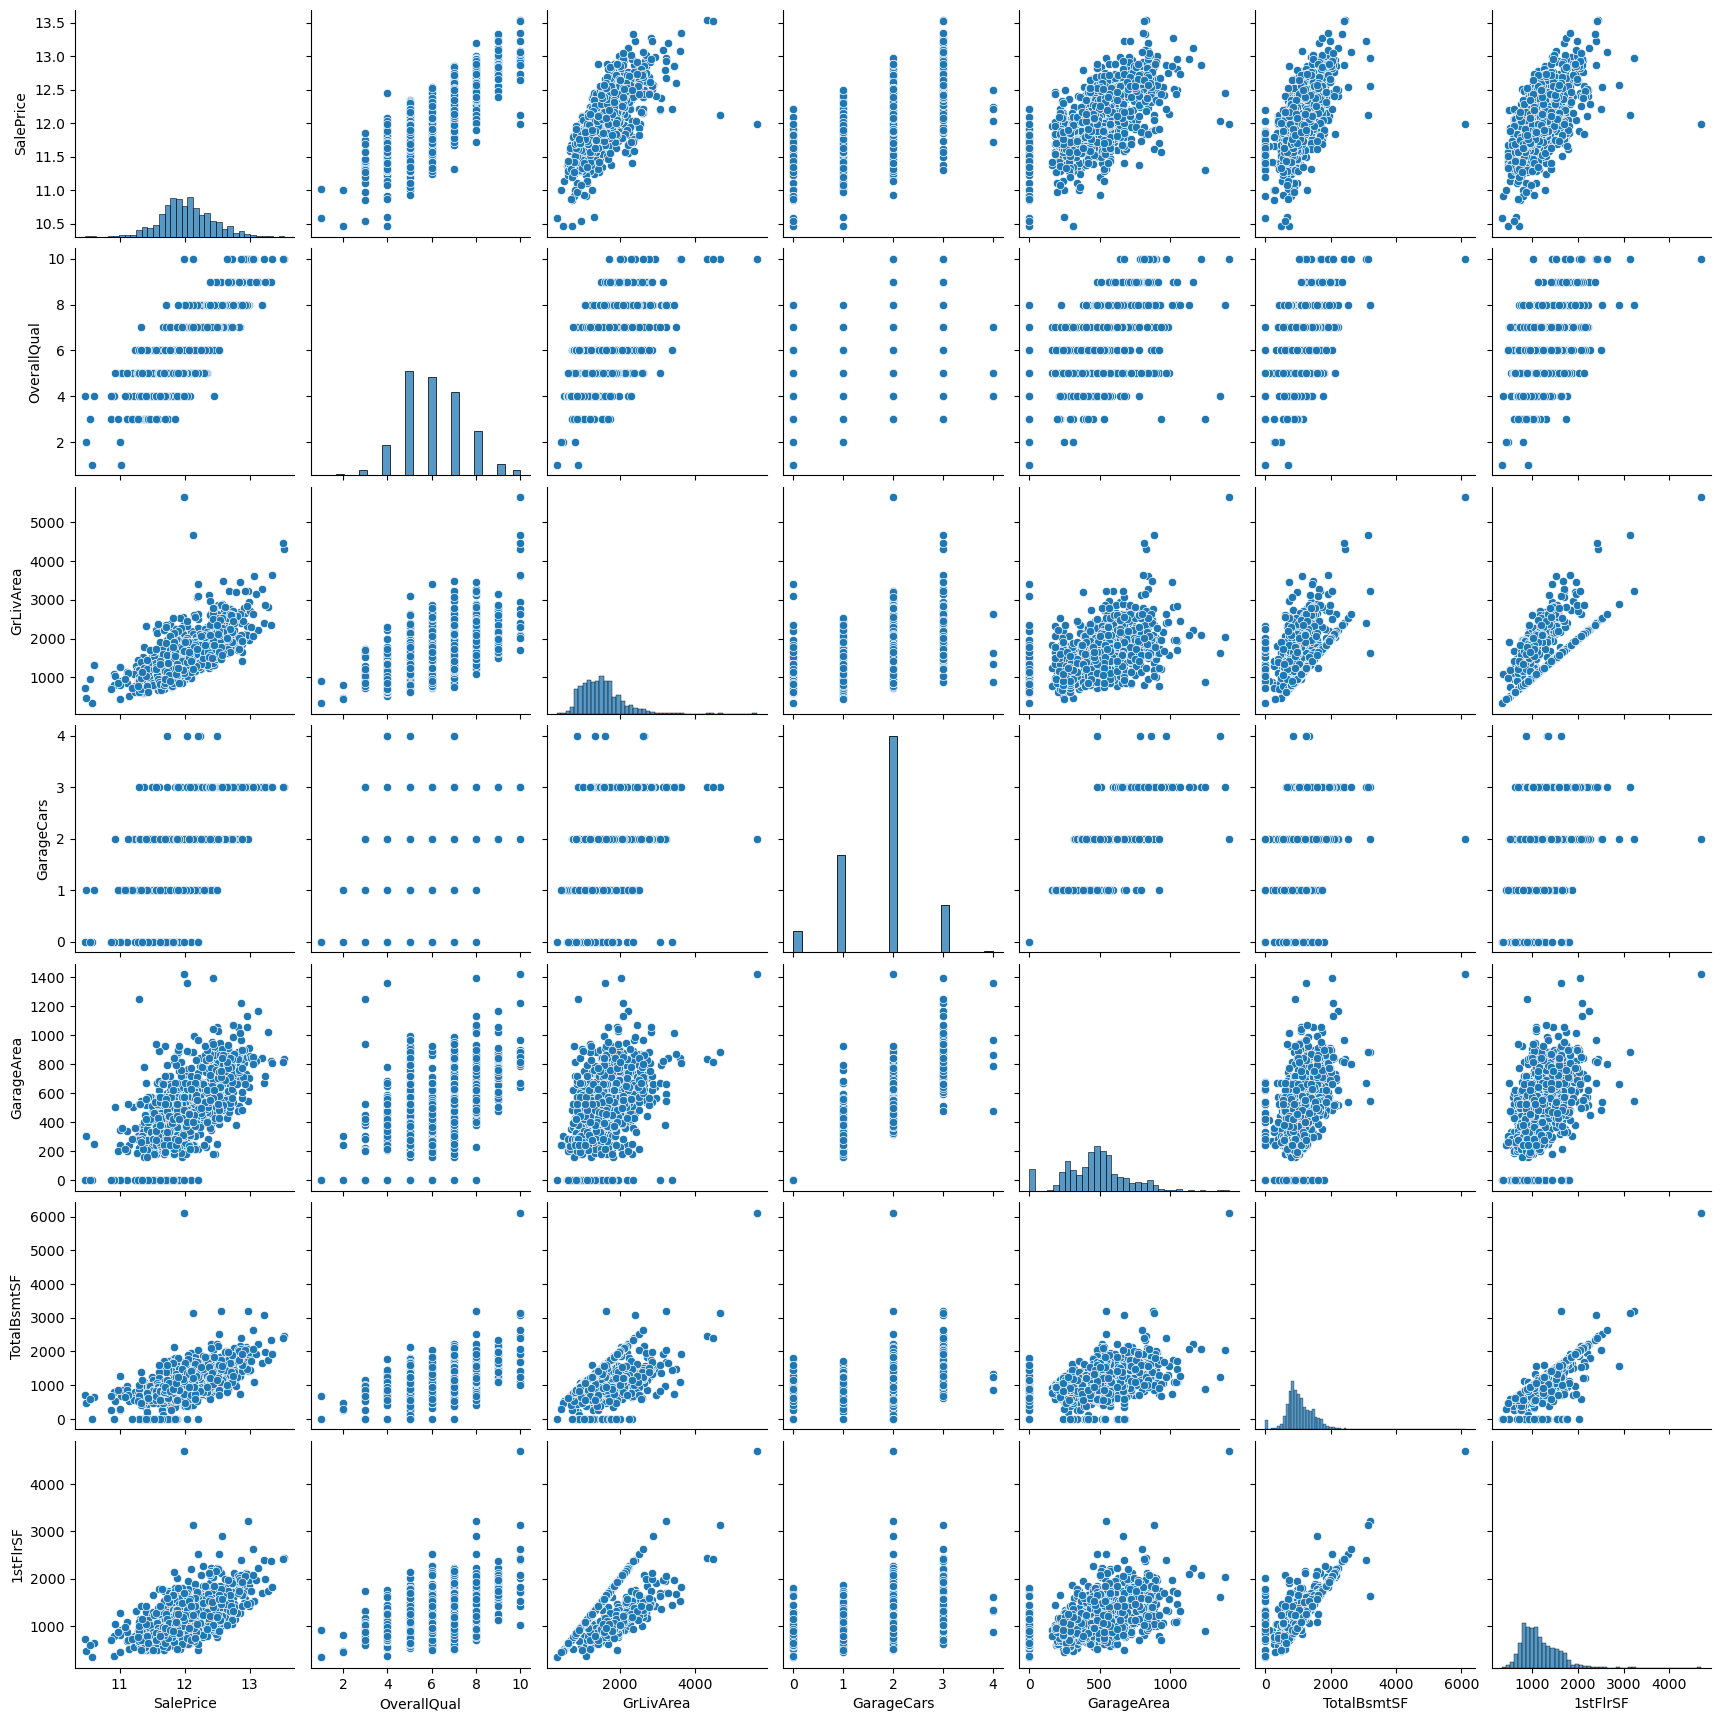

In [58]:
# Selecting highly correlated features
top_corr_features = ["SalePrice", "OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", "1stFlrSF"]

# Creating a pairplot
sns.pairplot(houseprice_df[top_corr_features])
plt.show()

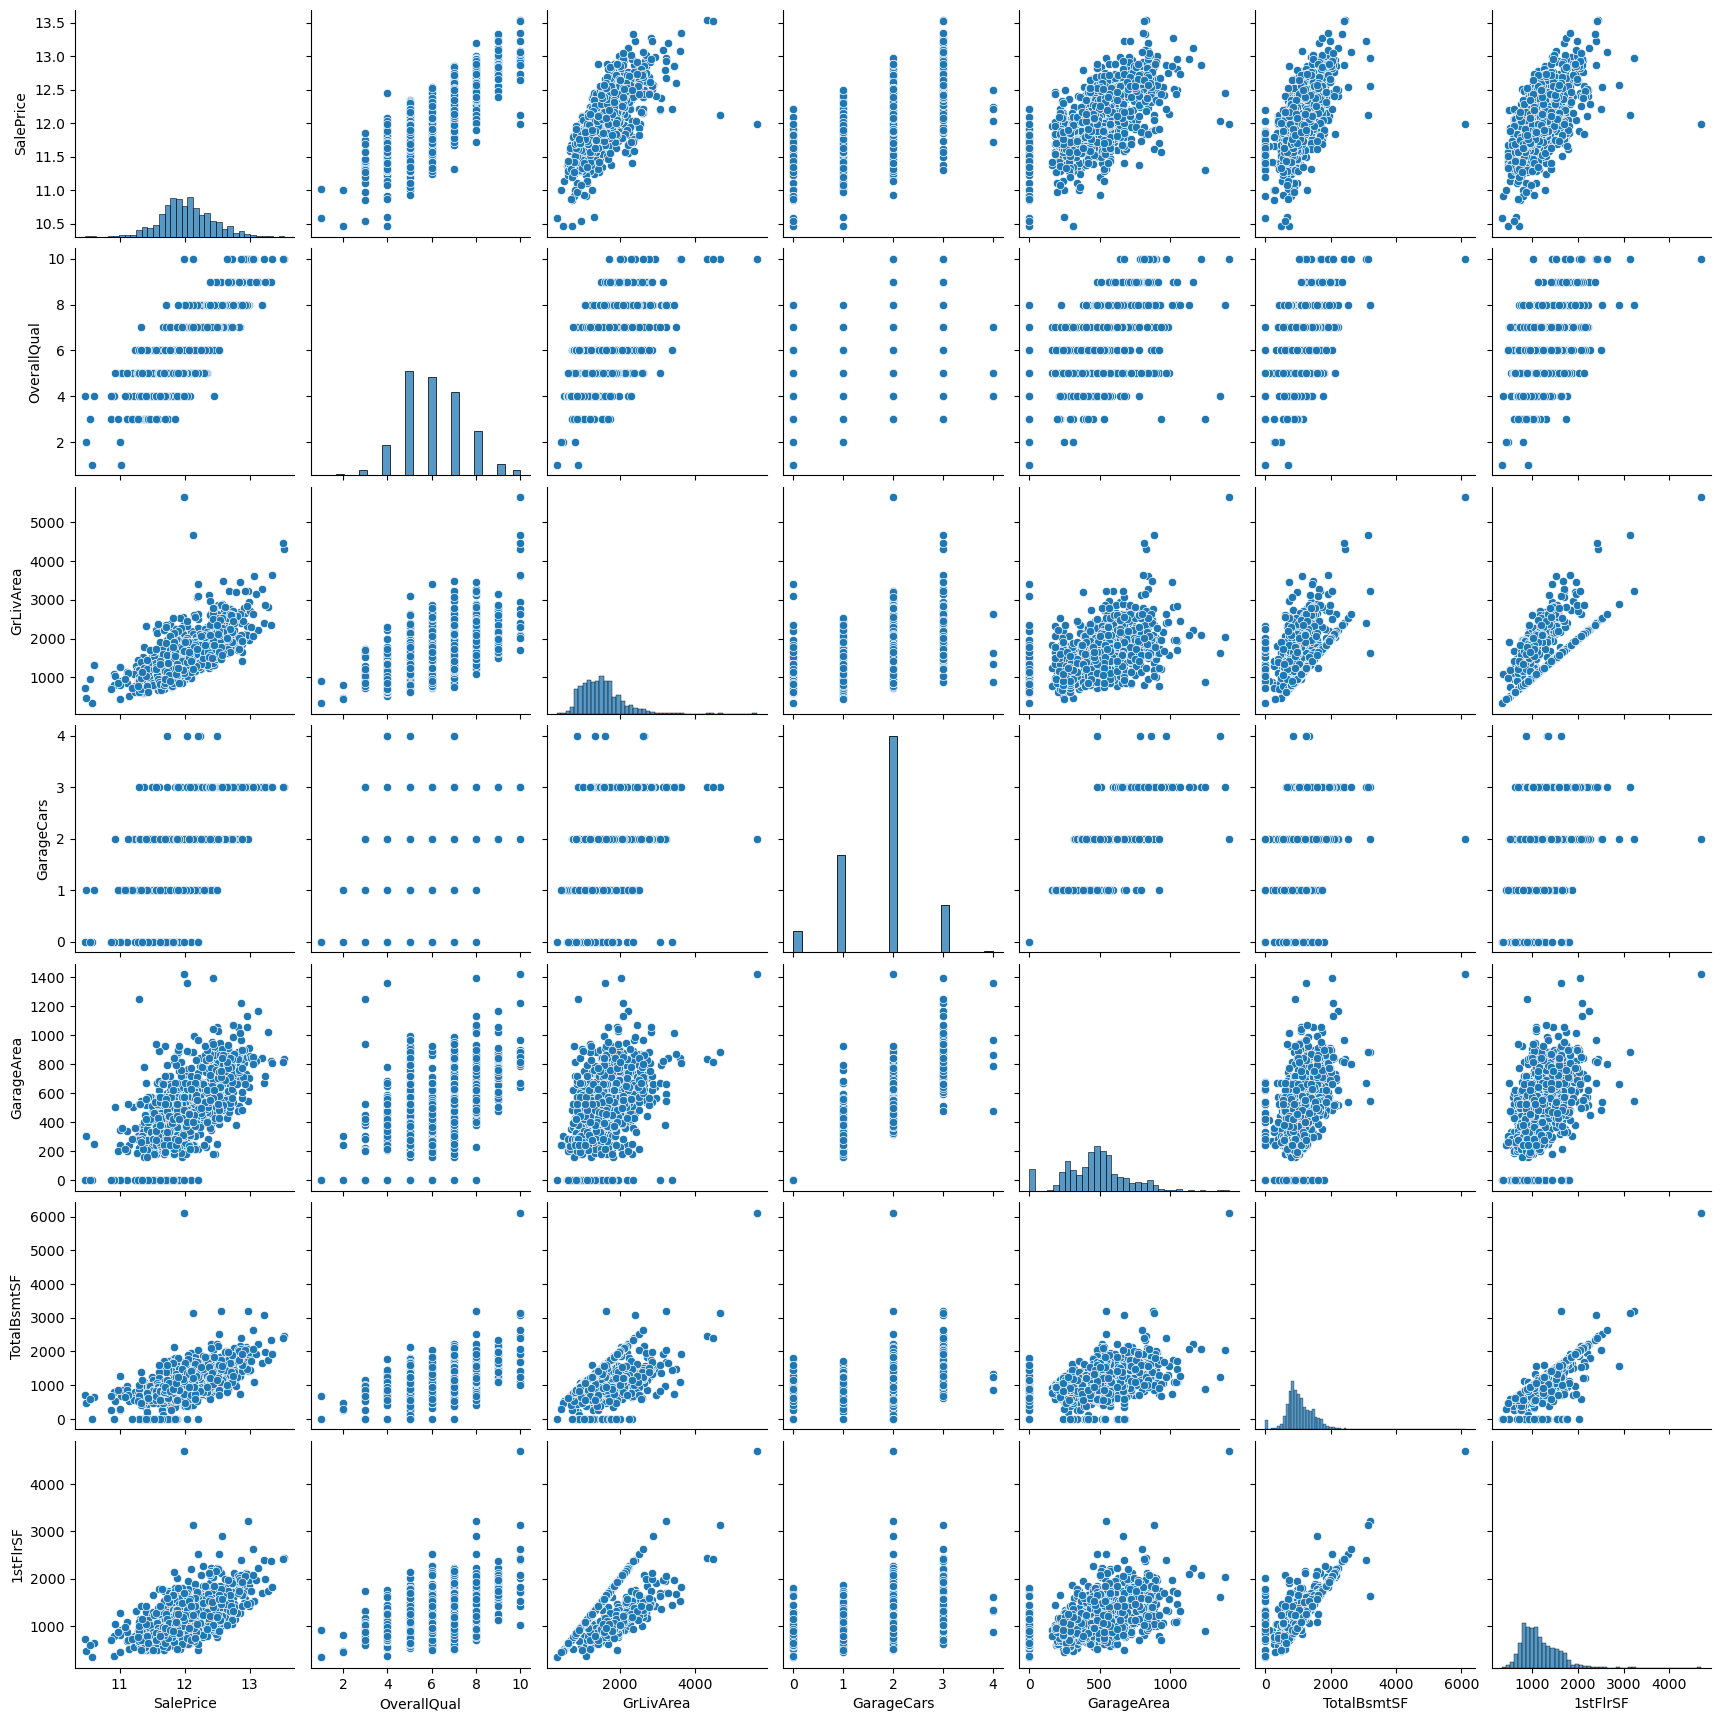

In [61]:
# Encoding categorical variables using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Save the cleaned dataset for modeling
houseprice_df.to_csv("cleaned_train.csv", index=False)

# Display final dataset info
houseprice_df.info()

In [63]:
# Encoding categorical variables using one-hot encoding
houseprice_df = pd.get_dummies(houseprice_df, drop_first=True)

In [64]:
# Save the cleaned dataset for modeling
houseprice_df.to_csv("cleaned_train.csv", index=False)

In [65]:
# Display final dataset info
houseprice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 246 entries, Id to SaleCondition_Partial
dtypes: bool(208), float64(38)
memory usage: 730.1 KB
